In [25]:
#%matplotlib inline
#%matplotlib notebook

In [26]:
import cytoflow as flow
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
import scipy.stats as stats
import scipy as sp
from scipy.stats.mstats import gmean
import scipy.optimize as opt
import numpy as np
from numpy import median
matplotlib.rc('figure', dpi = 160)

# Import samples and specify experimental condtions

sets the conditions of the tube

In [27]:
inputs = [
    ["LasRv3 rep2_Tube_001_099.fcs",0,0,'WT'],
    
    ["LasRv3 rep2_Tube_002_100.fcs",1e-8,0,'LasR'],
    ["LasRv3 rep2_Tube_003_101.fcs",1e-9,0,'LasR'],
    ["LasRv3 rep2_Tube_004_102.fcs",1e-10,0,'LasR'],
    ["LasRv3 rep2_Tube_005_103.fcs",1e-11,0,'LasR'],
    ["LasRv3 rep2_Tube_006_104.fcs",1e-12,0,'LasR'],
    ["LasRv3 rep2_Tube_007_105.fcs",1e-13,0,'LasR'],
    ["LasRv3 rep2_Tube_008_106.fcs",1e-14,0,'LasR'],
    ["LasRv3 rep2_Tube_009_107.fcs",0,0,'LasR'],
    
    ["LasRv3 rep2_Tube_010_108.fcs",1e-8,0.005,'LasR'],
    ["LasRv3 rep2_Tube_011_109.fcs",1e-9,0.005,'LasR'],
    ["LasRv3 rep2_Tube_012_110.fcs",1e-10,0.005,'LasR'],
    ["LasRv3 rep2_Tube_013_111.fcs",1e-11,0.005,'LasR'],
    ["LasRv3 rep2_Tube_014_112.fcs",1e-12,0.005,'LasR'],
    ["LasRv3 rep2_Tube_015_113.fcs",1e-13,0.005,'LasR'],
    ["LasRv3 rep2_Tube_016_114.fcs",1e-14,0.005,'LasR'],
    ["LasRv3 rep2_Tube_017_115.fcs",0,0.005,'LasR'],
    
    ["LasRv3 rep2_Tube_018_116.fcs",1e-8,0.01,'LasR'],
    ["LasRv3 rep2_Tube_019_117.fcs",1e-9,0.01,'LasR'],
    ["LasRv3 rep2_Tube_020_118.fcs",1e-10,0.01,'LasR'],
    ["LasRv3 rep2_Tube_021_119.fcs",1e-11,0.01,'LasR'],
    ["LasRv3 rep2_Tube_022_120.fcs",1e-12,0.01,'LasR'],
    ["LasRv3 rep2_Tube_023_121.fcs",1e-13,0.01,'LasR'],
    ["LasRv3 rep2_Tube_024_122.fcs",1e-14,0.01,'LasR'],
    ["LasRv3 rep2_Tube_025_123.fcs",0,0.01,'LasR'],
    
    ["LasRv3 rep2_Tube_026_124.fcs",1e-8,0.05,'LasR'],
    ["LasRv3 rep2_Tube_027_125.fcs",1e-9,0.05,'LasR'],
    ["LasRv3 rep2_Tube_028_126.fcs",1e-10,0.05,'LasR'],
    ["LasRv3 rep2_Tube_029_127.fcs",1e-11,0.05,'LasR'],
    ["LasRv3 rep2_Tube_030_128.fcs",1e-12,0.05,'LasR'],
    ["LasRv3 rep2_Tube_031_129.fcs",1e-13,0.05,'LasR'],
    ["LasRv3 rep2_Tube_032_130.fcs",1e-14,0.05,'LasR'],
    ["LasRv3 rep2_Tube_033_131.fcs",0,0.05,'LasR'],
    
    ["LasRv3 rep2_Tube_034_132.fcs",1e-8,0.1,'LasR'],
    ["LasRv3 rep2_Tube_035_133.fcs",1e-9,0.1,'LasR'],
    ["LasRv3 rep2_Tube_036_134.fcs",1e-10,0.1,'LasR'],
    ["LasRv3 rep2_Tube_037_135.fcs",1e-11,0.1,'LasR'],
    ["LasRv3 rep2_Tube_038_136.fcs",1e-12,0.1,'LasR'],
    ["LasRv3 rep2_Tube_039_137.fcs",1e-13,0.1,'LasR'],
    ["LasRv3 rep2_Tube_040_138.fcs",1e-14,0.1,'LasR'],
    ["LasRv3 rep2_Tube_041_139.fcs",0,0.1,'LasR'],
    
    ["LasRv3 rep2_Tube_042_140.fcs",1e-8,0.5,'LasR'],
    ["LasRv3 rep2_Tube_043_141.fcs",1e-9,0.5,'LasR'],
    ["LasRv3 rep2_Tube_044_142.fcs",1e-10,0.5,'LasR'],
    ["LasRv3 rep2_Tube_045_143.fcs",1e-11,0.5,'LasR'],
    ["LasRv3 rep2_Tube_046_144.fcs",1e-12,0.5,'LasR'],
    ["LasRv3 rep2_Tube_047_145.fcs",1e-13,0.5,'LasR'],
    ["LasRv3 rep2_Tube_048_146.fcs",1e-14,0.5,'LasR'],
    ["LasRv3 rep2_Tube_049_147.fcs",0,0.5,'LasR'],

   
    


]

       
tubes = []
for filename, ahl, iptg, family in inputs:
    tubes.append(flow.Tube(file = 'data/' + filename, conditions = {'AHL' : ahl, 'IPTG' : iptg, 'Family' : family}))
    
ex = flow.ImportOp(conditions = {'AHL' : 'float', 'IPTG' : 'float', 'Family' : 'str'},
                   tubes = tubes).apply()
       


In [28]:
flow.set_default_scale("log")

# Plot FITC-A histograms for all IPTG and AHL induction conditions

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10


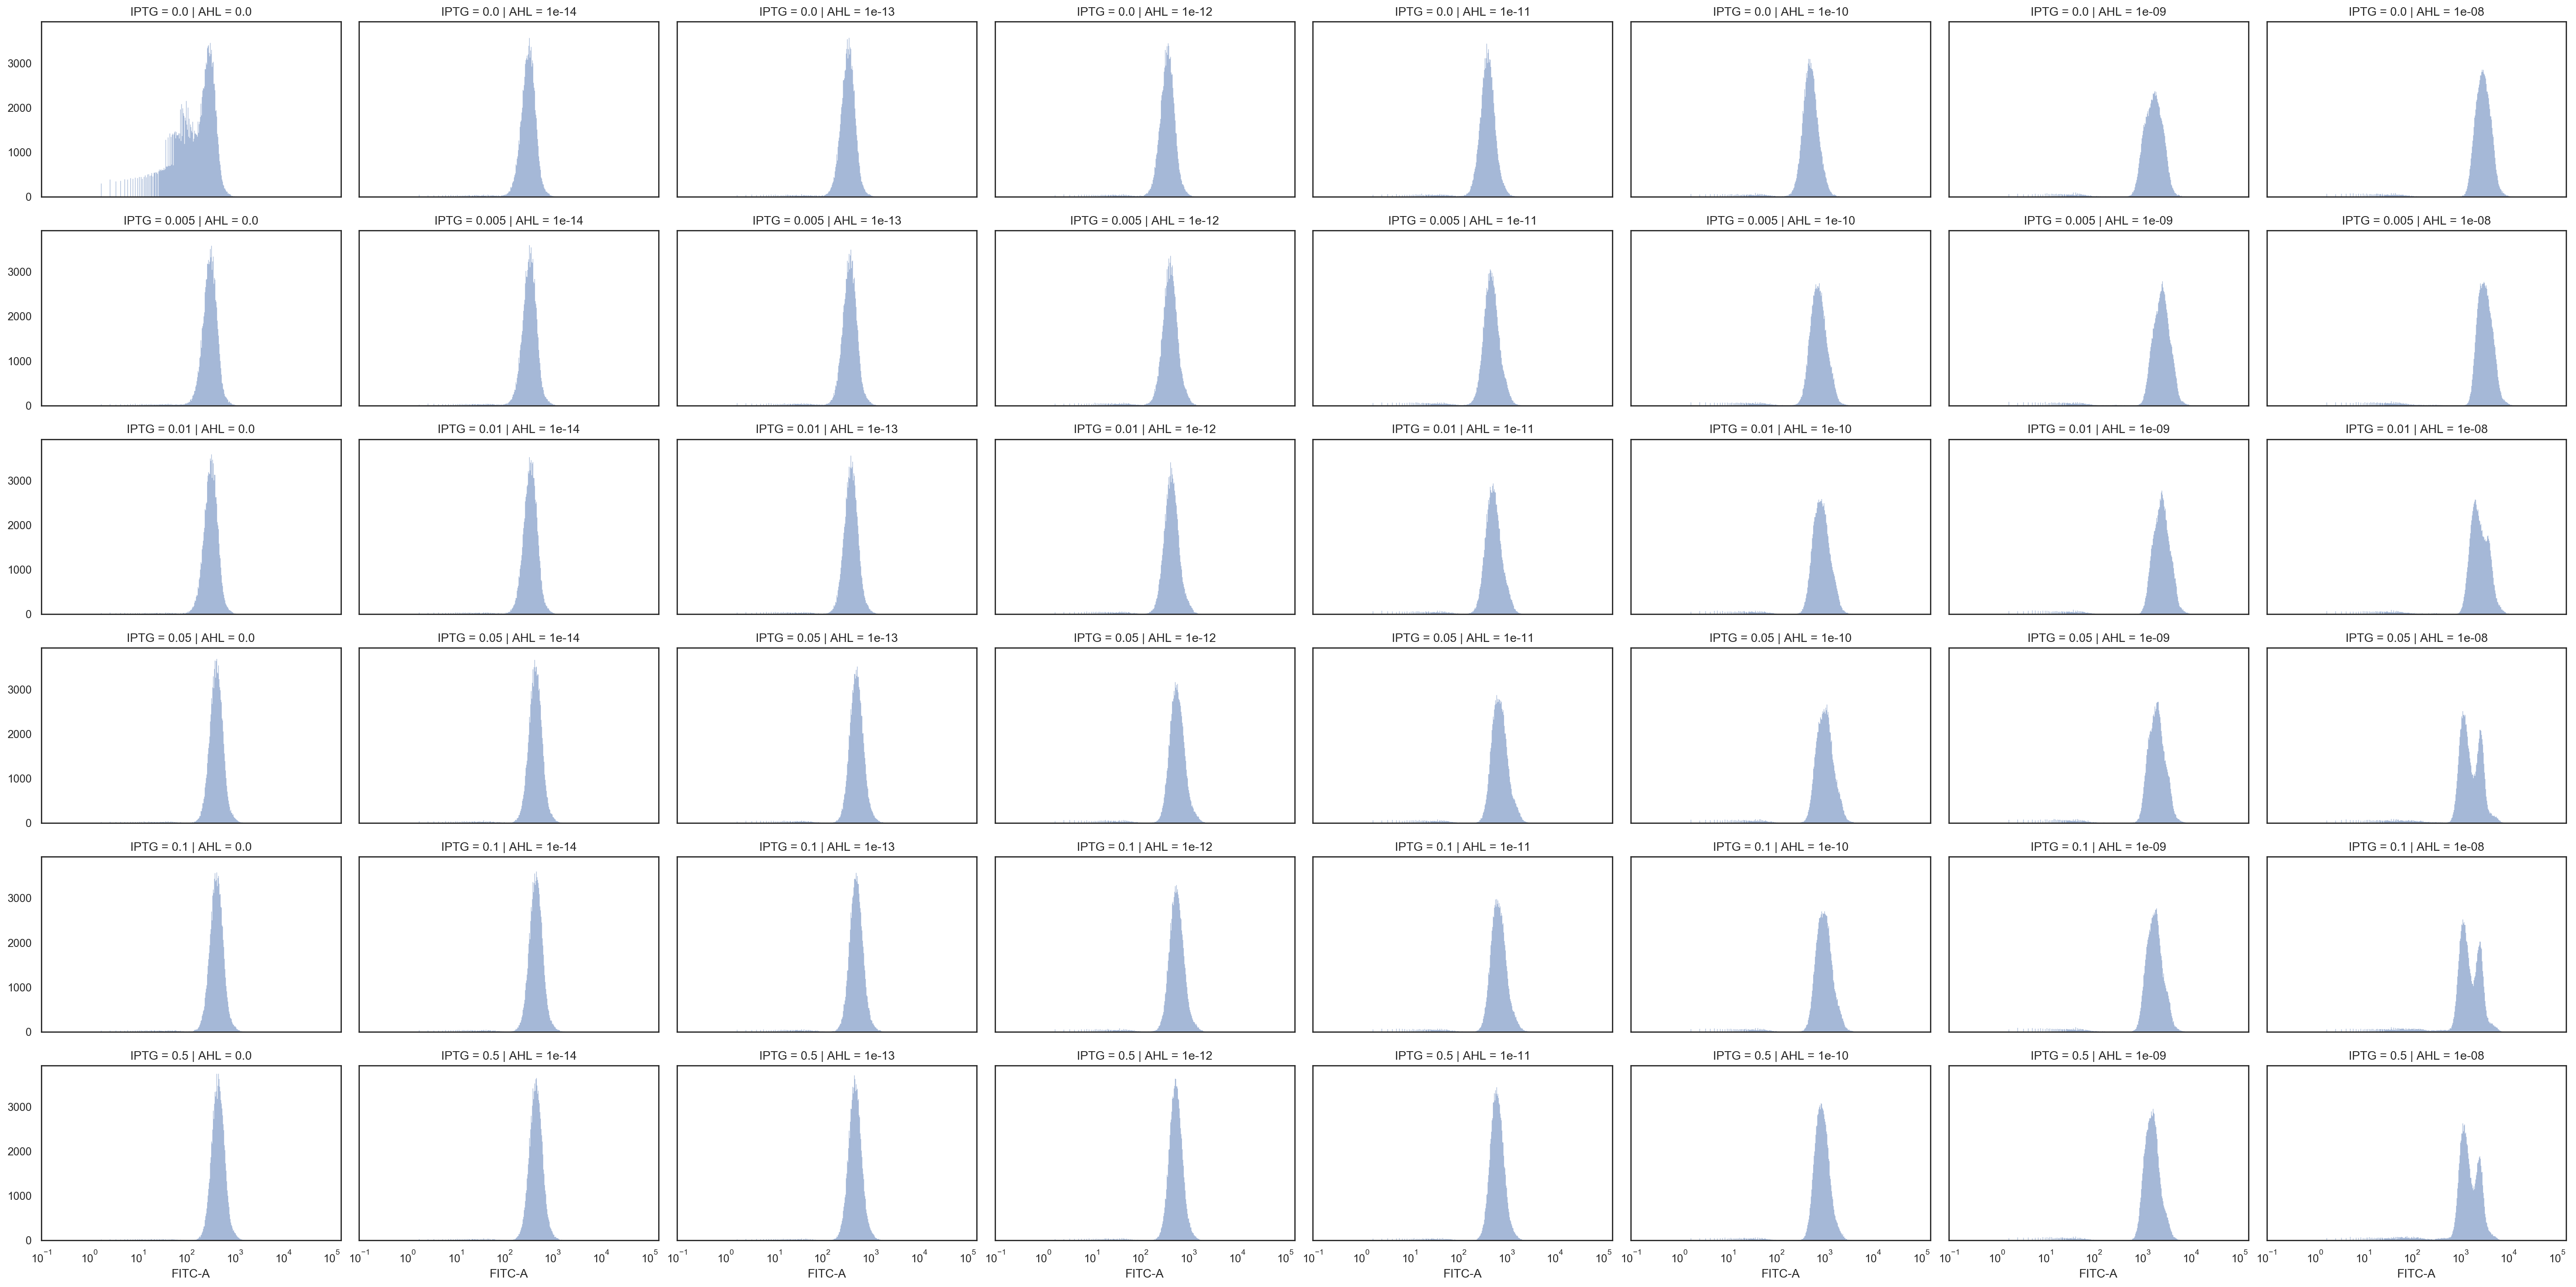

In [29]:

flow.HistogramView(channel = "FITC-A",
                   xfacet = "AHL",
                  yfacet = 'IPTG').plot(ex)

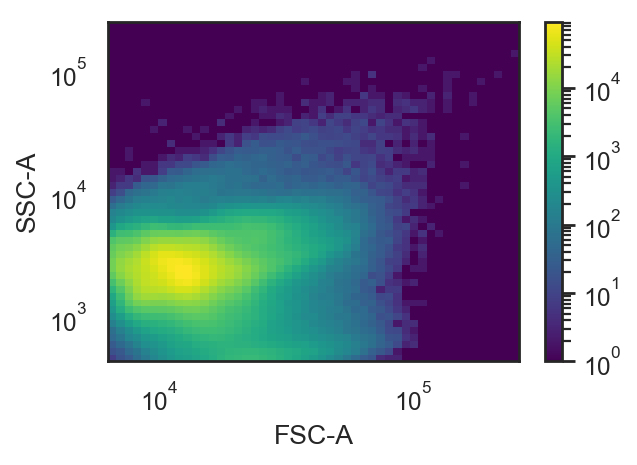

In [30]:
flow.DensityView(xchannel = "FSC-A", 
                 ychannel = "SSC-A",
                 xscale = 'log',
                 yscale = 'log').plot(ex, min_quantile = 0.005)

# Singlet gating to remove doublets

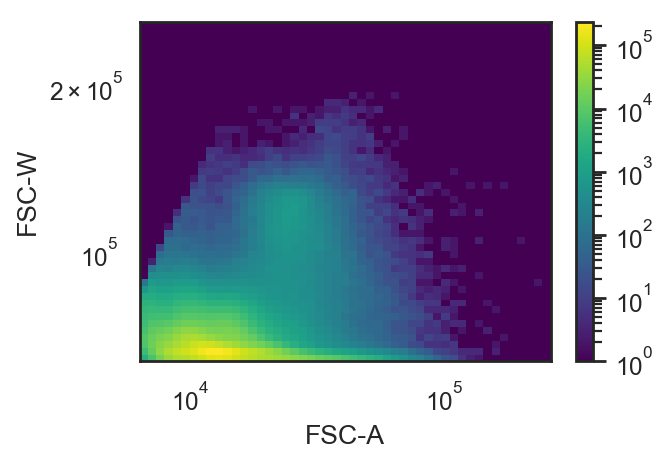

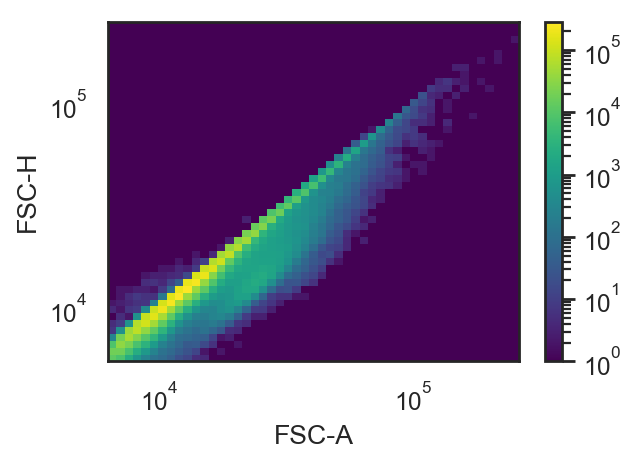

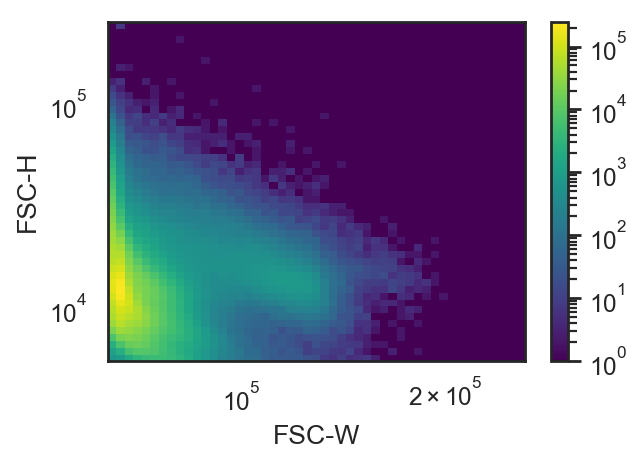

In [31]:

#channels = ['FSC-A','FSC-W','FSC-H','SSC-A','SSC-W','SSC-H']
#perm = combinations(channels,2)
FSC = [('FSC-A','FSC-W'),('FSC-A','FSC-H'),('FSC-W','FSC-H')]

#f, axes = plt.subplots(ncols=4,nrows=4)
#axs = axes.ravel()
for i,(x,y) in enumerate(FSC):  
    flow.DensityView(xchannel = x, 
                ychannel = y,
                xscale = 'log',
                yscale = 'log').plot(ex, min_quantile = 0.005)


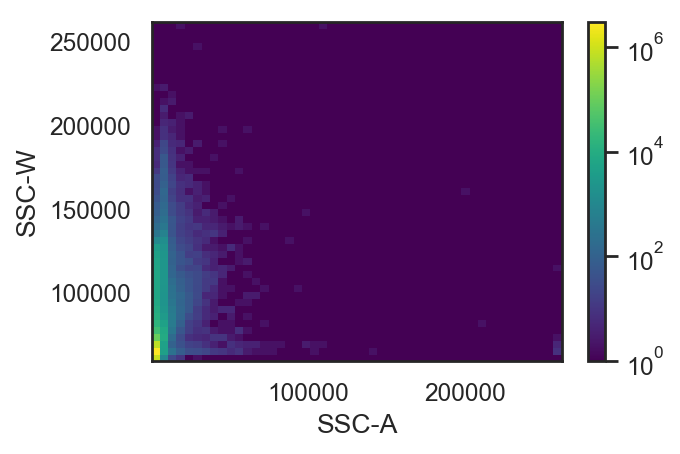

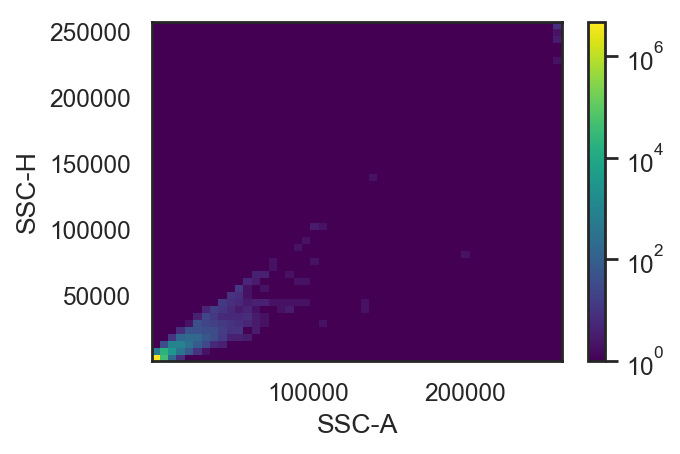

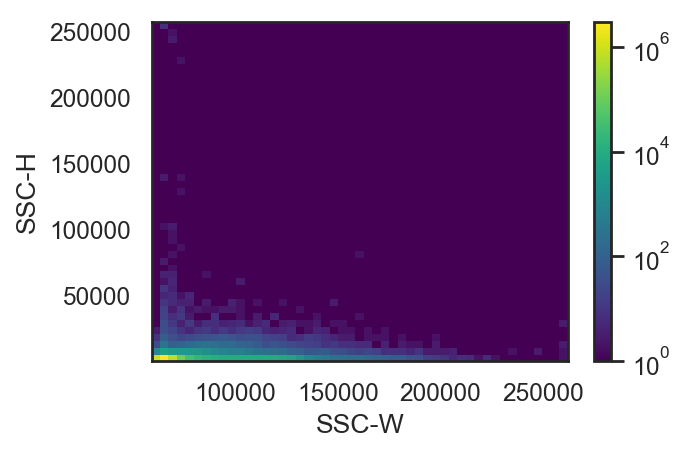

In [32]:
SSC = [('SSC-A','SSC-W'),('SSC-A','SSC-H'),('SSC-W','SSC-H')]
for i,(x,y) in enumerate(SSC):  
    flow.DensityView(xchannel = x, 
                ychannel = y,
                xscale = 'linear',
                yscale = 'linear').plot(ex, min_quantile = 0.005)

## Create and store singlet gate

saves the single data as ex2

In [33]:
r = flow.Range2DOp(name = "Range2D",
                   xchannel = "SSC-W",
                   xlow = 55000,
                   xhigh = 80000,
                   ychannel = "SSC-H",
                   ylow = 100,
                   yhigh = 10000)
                   
rv = r.default_view(xscale ='log',yscale='log')

rv.plot(ex)
ex2 = r.apply(ex)

## Use a gaussian mixture model to further gate the population

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\gaussian.py:529: RuntimeWarning: invalid value encountered in less_equal
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\base_op_views.py:342: CytoflowViewWarning: Setting 'huefacet' to 'GM_1'


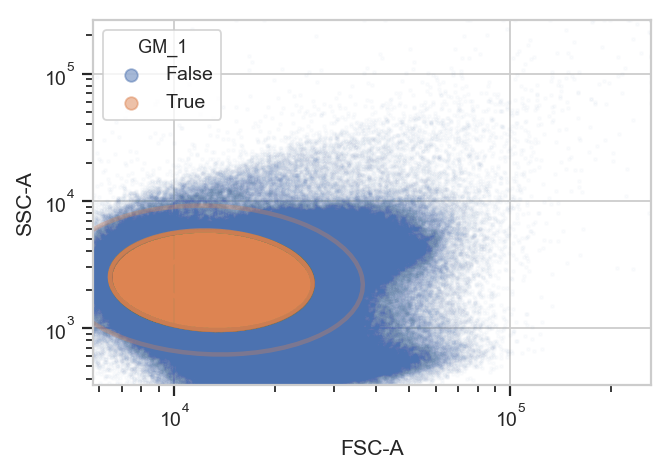

In [10]:
gm = flow.GaussianMixtureOp(name = "GM",
                            channels = ['FSC-A', 'SSC-A'],
                            scale = {'FSC-A' : 'log',
                                     'SSC-A' : 'log'},
                            num_components = 1,
                            sigma = 2)
gm.estimate(ex2)
ex_gm = gm.apply(ex2)
gm.default_view().plot(ex_gm, alpha = 0.02)

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\gaussian.py:529: RuntimeWarning: invalid value encountered in less_equal
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\base_op_views.py:342: CytoflowViewWarning: Setting 'huefacet' to 'GM3_1'


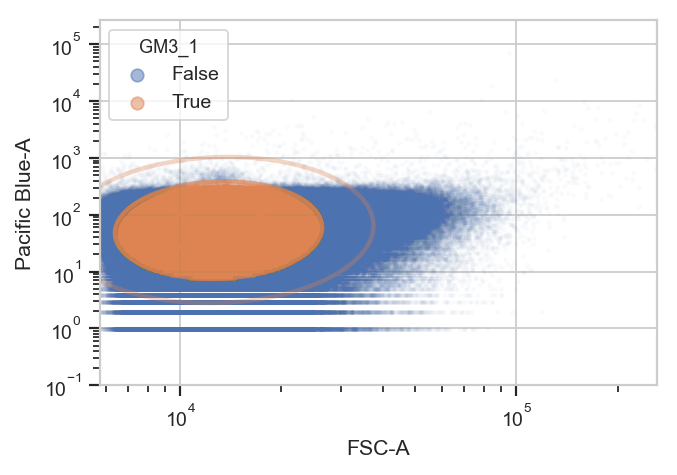

In [11]:
gm3 = flow.GaussianMixtureOp(name = "GM3",
                            channels = ['FSC-A', 'Pacific Blue-A'],
                            scale = {'FSC-A' : 'log',
                                     'Pacific Blue-A' : 'log'},
                            num_components = 1,
                            sigma = 2)
gm3.estimate(ex_gm)
ex_gm2 = gm3.apply(ex_gm)
gm3.default_view().plot(ex_gm2, alpha = 0.02)

In [12]:
df =ex_gm2.data

take the stuff from cytoflow and changing it to datatframe

# filter out events that don't fall within the gates

In [13]:

df = df[(df.GM_1==True) & (df.GM3_1==True) & (df.Range2D==True) & (df['FITC-A'] >0)]
df

,AHL,AmCyan-A,AmCyan-H,AmCyan-W,FITC-A,FITC-H,FITC-W,FSC-A,FSC-H,FSC-W,...,PerCP-Cy5-5-A,PerCP-Cy5-5-H,PerCP-Cy5-5-W,SSC-A,SSC-H,SSC-W,Time,Range2D,GM_1,GM3_1
0,0.0,154.839996,108.0,93959.203125,7.920000,83.0,6253.555664,7986.930176,7383.0,70896.859375,...,14828.000000,14712.0,66052.734375,2822.159912,2755.0,67133.609375,52.000000,True,True,True
1,0.0,-11.760000,125.0,0.000000,7.920000,118.0,4398.687500,10046.260742,10034.0,65616.085938,...,12652.639648,12425.0,66736.695312,1881.439941,1906.0,64691.527344,52.000000,True,True,True
5,0.0,113.680000,122.0,61066.664062,117.919998,151.0,51178.839844,9749.879883,9043.0,70658.875000,...,17332.480469,16302.0,69678.664062,4063.840088,3895.0,68376.843750,52.200001,True,True,True
6,0.0,-45.080002,28.0,0.000000,123.199997,99.0,81555.906250,9237.419922,9335.0,64850.945312,...,7380.560059,7752.0,62395.820312,1374.559937,1427.0,63127.652344,52.200001,True,True,True
7,0.0,-17.639999,74.0,0.000000,2.640000,47.0,3681.170898,9216.980469,9371.0,64458.871094,...,9588.479492,10366.0,60620.359375,1914.880005,1979.0,63412.617188,52.299999,True,True,True
10,0.0,-75.459999,56.0,0.000000,65.120003,47.0,90802.226562,9154.930664,9031.0,66435.343750,...,10475.519531,10192.0,67359.070312,2816.879883,2812.0,65649.734375,52.599998,True,True,True
11,0.0,84.279999,71.0,77794.000000,23.760000,59.0,26392.126953,11202.580078,11407.0,64361.562500,...,8415.440430,8499.0,64891.671875,1795.199951,1839.0,63975.105469,52.599998,True,True,True
12,0.0,15.680000,108.0,9514.856445,86.239998,98.0,57671.679688,8587.720703,7910.0,71151.062500,...,17394.958984,17368.0,65637.726562,3498.879883,3462.0,66234.140625,52.599998,True,True,True
13,0.0,153.860001,124.0,81317.492188,72.159996,105.0,45038.832031,14134.990234,12813.0,72297.726562,...,24374.240234,23272.0,68640.007812,4132.479980,4093.0,66168.148438,52.599998,True,True,True
14,0.0,5.880000,101.0,3815.363037,10.559999,128.0,5406.719727,9243.259766,9332.0,64912.804688,...,9566.479492,8753.0,71626.734375,1635.920044,1744.0,61474.574219,52.700001,True,True,True


In [14]:
df.columns 



Index(['AHL', 'AmCyan-A', 'AmCyan-H', 'AmCyan-W', 'FITC-A', 'FITC-H', 'FITC-W',
       'FSC-A', 'FSC-H', 'FSC-W', 'Family', 'IPTG', 'Pacific Blue-A',
       'Pacific Blue-H', 'Pacific Blue-W', 'PerCP-Cy5-5-A', 'PerCP-Cy5-5-H',
       'PerCP-Cy5-5-W', 'SSC-A', 'SSC-H', 'SSC-W', 'Time', 'Range2D', 'GM_1',
       'GM3_1'],
      dtype='object')

In [15]:
data = df[['FITC-A','AHL','IPTG','Family']]
data.insert(4,'Replicate',2)
data.to_pickle('../compiled-data/se/las/LasSE_2.pkl')
#uncomment these when you are ready to save replicates and compile replicate from other runs

In [16]:
# Subtract WT background from samples
data = df[['FITC-A','AHL','IPTG','Family']]
data['FITC-A'] = data['FITC-A'] - data[data.Family=='WT']['FITC-A'].median()
data['FITC-A'] = data[data['FITC-A'] > 0]['FITC-A']
data = data[data.Family=='LasR']
data.drop('Family',inplace=True,axis=1)

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
data['FITC-A'].min()

0.8800048828125

In [18]:
data

,FITC-A,AHL,IPTG
100000,2761.440102,1.000000e-08,0.0
100001,2999.920082,1.000000e-08,0.0
100002,3031.600014,1.000000e-08,0.0
100003,3328.160072,1.000000e-08,0.0
100004,3183.840004,1.000000e-08,0.0
100005,3334.319984,1.000000e-08,0.0
100006,2380.400063,1.000000e-08,0.0
100007,4447.520180,1.000000e-08,0.0
100008,1941.279945,1.000000e-08,0.0
100011,1994.959877,1.000000e-08,0.0


# Plot median FITC-A

use median or geometeric mean 

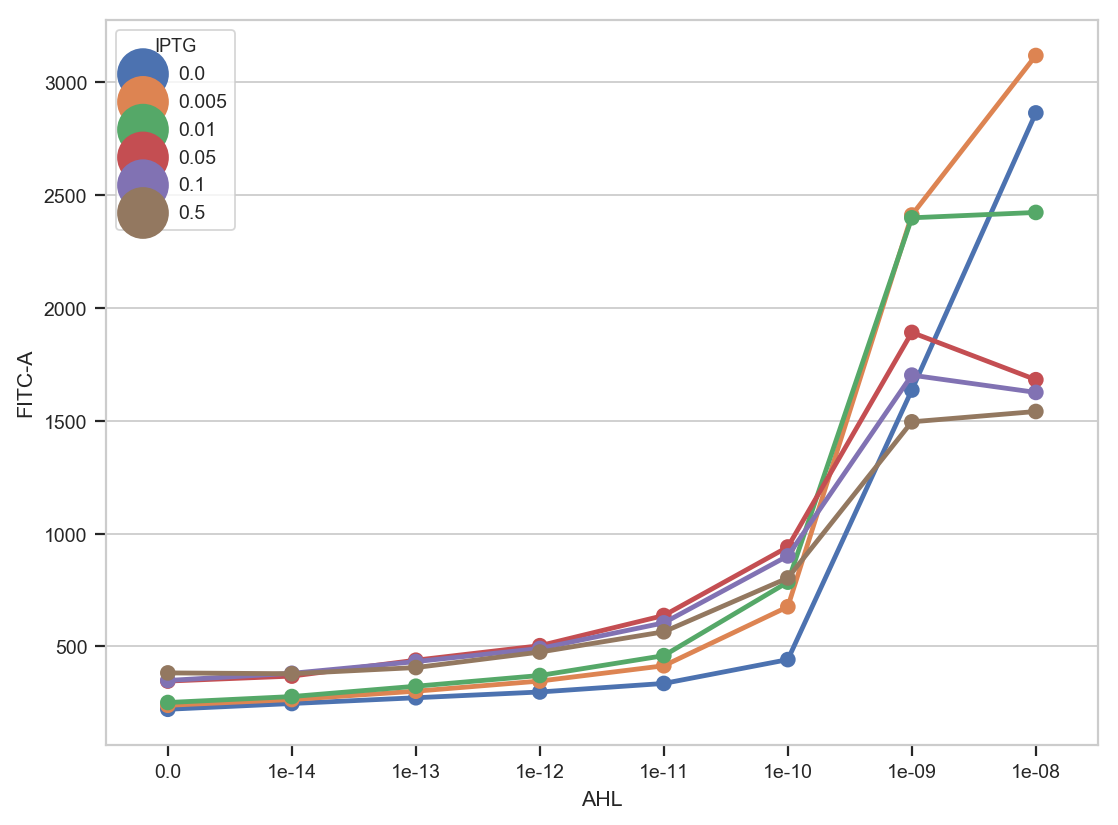

In [19]:
mfi = data.groupby(['AHL','IPTG'])['FITC-A'].median().reset_index()

f, ax = plt.subplots(figsize=(8,6))
sns.pointplot(x='AHL',y='FITC-A',hue='IPTG',data=mfi)
f.savefig('Las.png',dpi=600)

# Plot heatmaps showing absolute and relative induction

Raw signal 

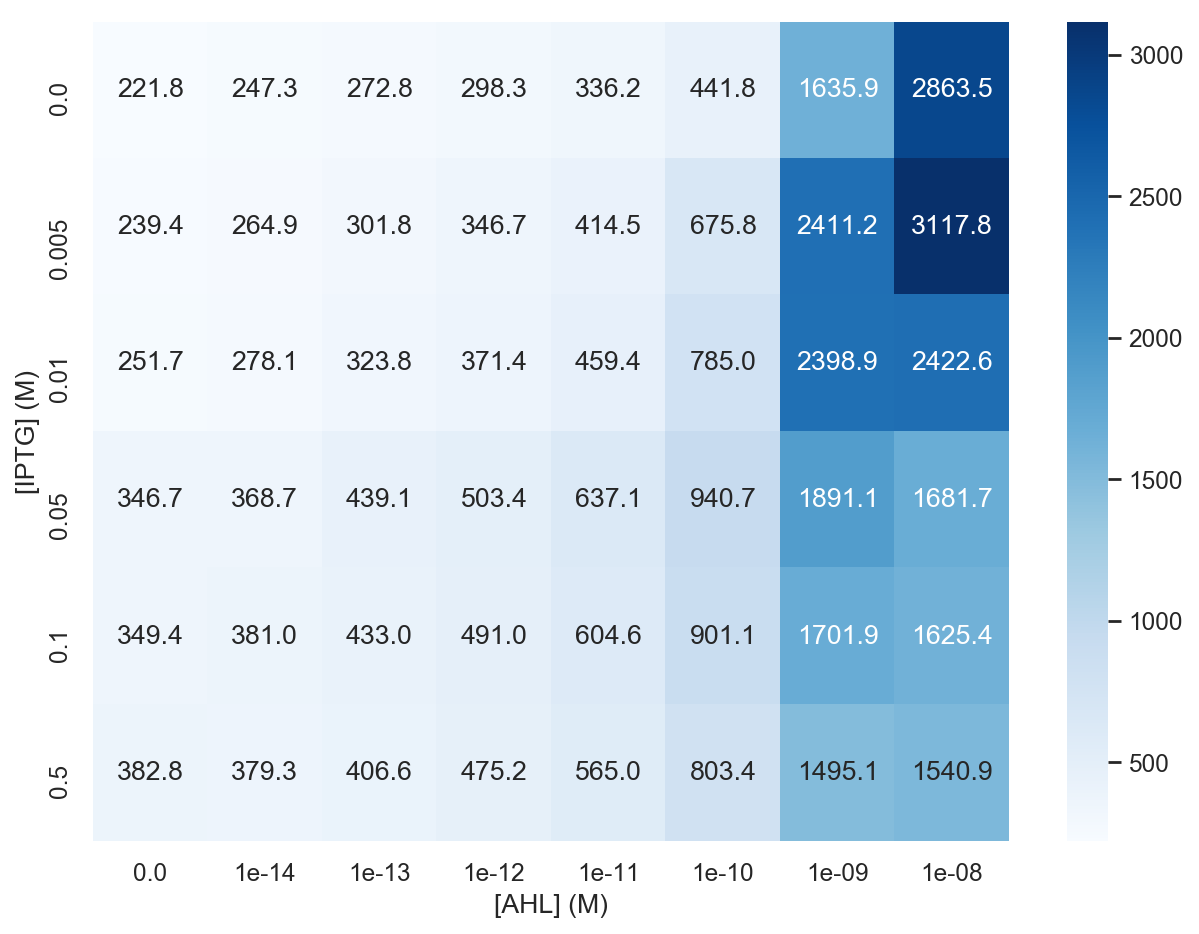

In [20]:
#LasMeans = Las.groupby(['C_ahl','C_iptg']).mean().reset_index()
sns.set(style="white")
#sns.set_style('Talk')
#LasTable = pd.pivot_table(LasMeans,values='FITC-A',index='C_iptg',columns='C_ahl')
f, ax = plt.subplots(figsize=(8,6))
#g = sns.heatmap(LasTable,vmin=0,vmax=100,xticklabels=[0,1e-10,1e-9,1e-7],yticklabels=[0,1e-3,1e-4,1e-5],ax=ax,square=True,cmap='Reds')



#f.savefig('LasHeatmap.png',dpi=600)

#mean['FITC-A']=mean['FITC-A']/mean['FITC-A'].max()*100

piv = mfi.pivot_table(index='IPTG', columns='AHL', values='FITC-A')
g = sns.heatmap(piv, annot=True, fmt=".1f",cmap='Blues')
cbar = g.collections[0].colorbar
#cbar.set_ticks([0, 25, 50, 75,100])
#cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.set_xlabel(r'[AHL] (M)')
ax.set_ylabel(r'[IPTG] (M)')
f.tight_layout()

Normalized to highest signal 

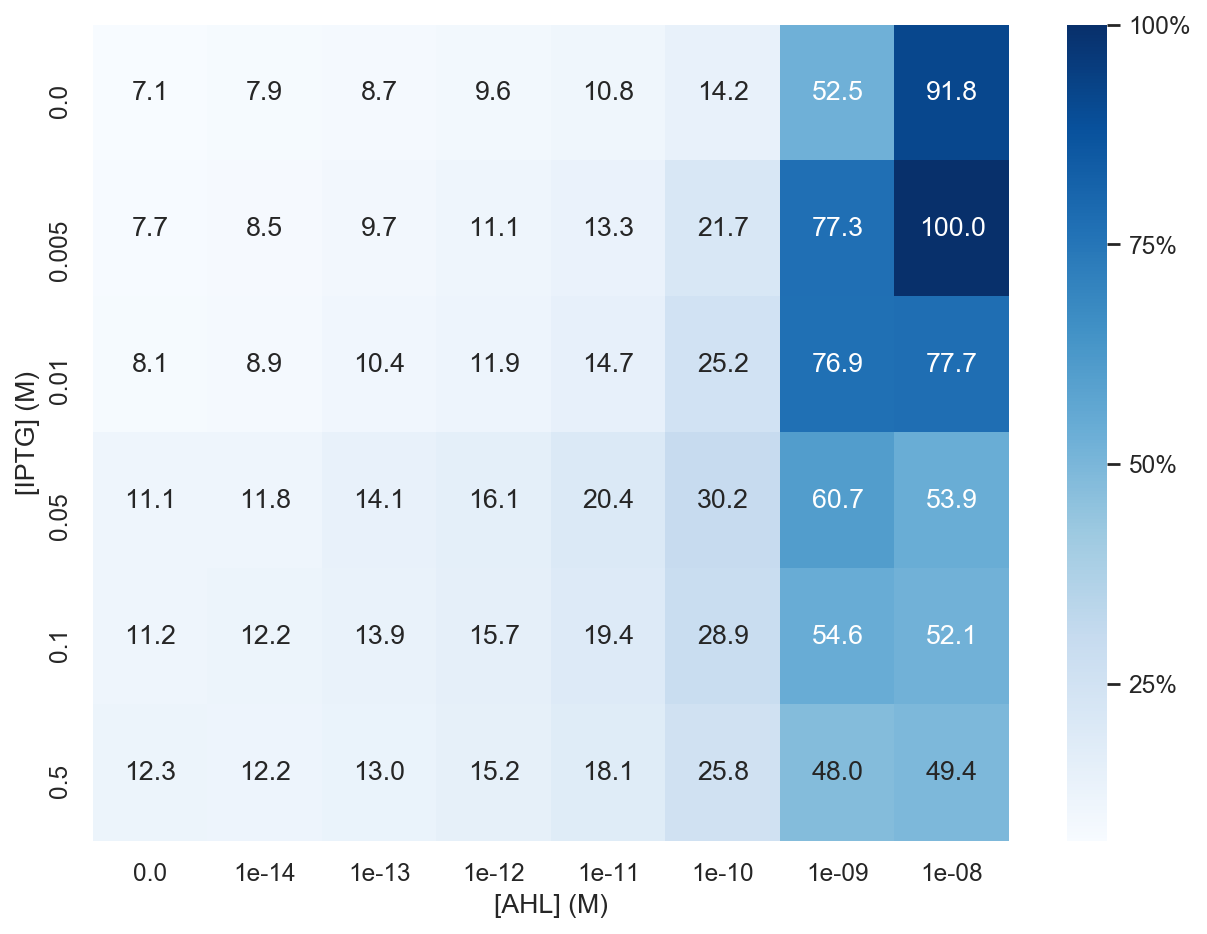

In [21]:
f, ax = plt.subplots(figsize=(8,6))
# normalized
norm = mfi.copy()
norm['FITC-A']=norm['FITC-A']/norm['FITC-A'].max()*100

piv = norm.pivot_table(index='IPTG', columns='AHL', values='FITC-A')
g = sns.heatmap(piv, annot=True, fmt=".1f",cmap='Blues')
cbar = g.collections[0].colorbar
cbar.set_ticks([0, 25, 50, 75,100])
cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.set_xlabel(r'[AHL] (M)')
ax.set_ylabel(r'[IPTG] (M)')
f.tight_layout()

# Calculate the on/off ratio and plot

In [22]:

R =[]
for i in mfi.IPTG.unique():
    tmp = mfi[mfi.IPTG ==i]['FITC-A'].max()/mfi[mfi.IPTG ==i]['FITC-A'].min()
    R.append([i,tmp])



In [23]:

R = pd.DataFrame(R,columns=['IPTG','Induction Ratio'])
R

,IPTG,Induction Ratio
0,0.000,12.912697
1,0.005,13.025736
2,0.010,9.625874
3,0.050,5.454315
4,0.100,4.871537
5,0.500,4.062645


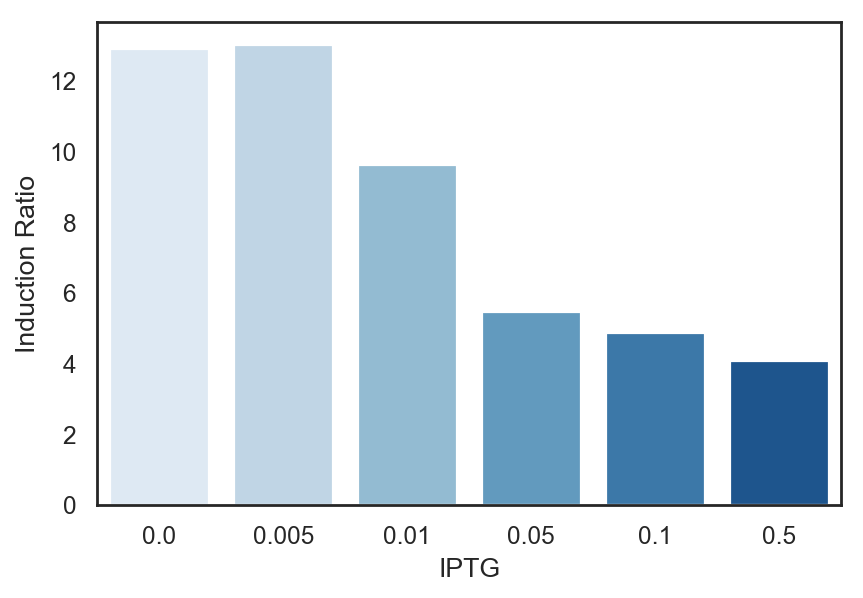

In [24]:
f, ax  = plt.subplots()
sns.barplot(x='IPTG',y='Induction Ratio',data=R,palette='Blues')

STOP HERE